In [1]:
import tables
from anndata import AnnData
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.sparse
import os

%matplotlib inline

In [2]:
sparsity_levels = [0.5, 0.6, 0.7, 0.8, 0.9]

disk_usage_dense_gzip = []
disk_usage_sparse_gzip = []

disk_usage_dense_blosk = []
disk_usage_sparse_blosk = []

for level in sparsity_levels:
    D = np.random.rand(20000, 4000)
    D[D<level]=0
    
    D_sp = sp.sparse.csr_matrix(D)
    
    AnnData(D).write('./dense_gzip_temp.h5ad')
    disk_usage_dense_gzip.append(int(os.path.getsize('./dense_gzip_temp.h5ad')/10**6))
    
    if os.path.isfile('./dense_gzip_temp.h5ad'):
        os.remove('./dense_gzip_temp.h5ad')
        
    AnnData(D_sp).write('./sparse_gzip_temp.h5ad')
    disk_usage_sparse_gzip.append(int(os.path.getsize('./sparse_gzip_temp.h5ad')/10**6))
    
    if os.path.isfile('./sparse_gzip_temp.h5ad'):
        os.remove('./sparse_gzip_temp.h5ad')
        
    AnnData(D).write('./dense_blosk_temp.h5ad', compression=32001)
    disk_usage_dense_blosk.append(int(os.path.getsize('./dense_blosk_temp.h5ad')/10**6))
    
    if os.path.isfile('./dense_blosk_temp.h5ad'):
        os.remove('./dense_blosk_temp.h5ad')
        
    AnnData(D_sp).write('./sparse_blosk_temp.h5ad', compression=32001)
    disk_usage_sparse_blosk.append(int(os.path.getsize('./sparse_blosk_temp.h5ad')/10**6))
    
    if os.path.isfile('./sparse_blosk_temp.h5ad'):
        os.remove('./sparse_blosk_temp.h5ad')
        
del D
del D_sp

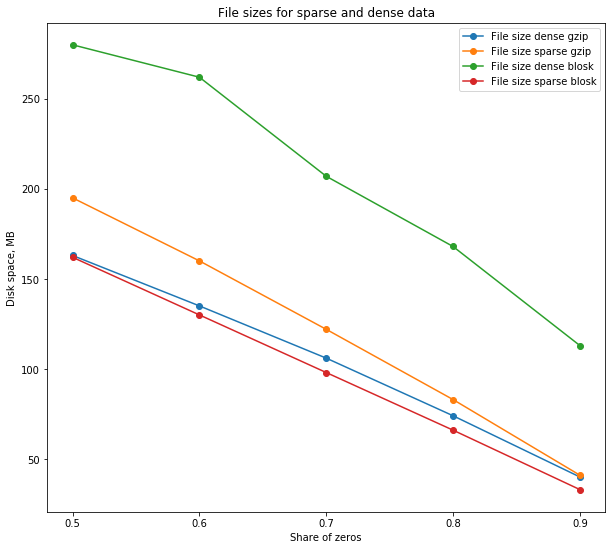

In [5]:
x = np.arange(len(sparsity_levels))

plt.figure(figsize=(10, 9))

plt.plot(x, disk_usage_dense_gzip, marker='o', label='File size dense gzip')
plt.plot(x, disk_usage_sparse_gzip, marker='o', label='File size sparse gzip')

plt.plot(x, disk_usage_dense_blosk, marker='o', label='File size dense blosk')
plt.plot(x, disk_usage_sparse_blosk, marker='o', label='File size sparse blosk')

plt.xticks(x, sparsity_levels)
plt.title('File sizes for sparse and dense data')
plt.xlabel('Share of zeros')
plt.ylabel('Disk space, MB')
plt.legend()

plt.show()